In [1]:
from PIL import Image
import numpy as np
from PIL import ImageChops, ImageOps
from PIL import ImageStat as stat
import matplotlib.pyplot as plt

In [2]:
def statystyki(im):
    s = stat.Stat(im)
    print("extrema ", s.extrema)  # max i min
    print("count ", s.count)  # zlicza
    print("mean ", s.mean)  # srednia
    print("median ", s.median)  # mediana
    print("stddev ", s.stddev)  # odchylenie standardowe

RGB


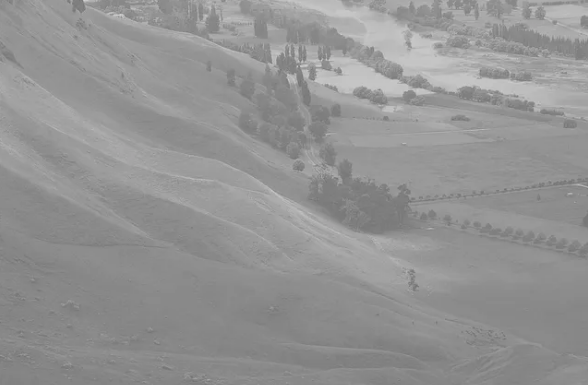

In [3]:
widok = Image.open('widok.png')
print(widok.mode)
widok

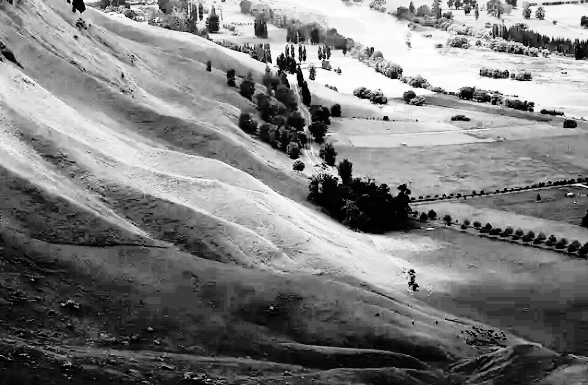

In [4]:
widok_equalized = ImageOps.equalize(widok, mask = None)
widok_equalized 

In [5]:
im = Image.open('brain.png')
print(im.mode)
print(im.size)
statystyki(im)

RGBA
(352, 326)
extrema  [(0, 255), (0, 255), (0, 255), (255, 255)]
count  [114752, 114752, 114752, 114752]
mean  [64.40476854433909, 64.40476854433909, 64.40476854433909, 255.0]
median  [68, 68, 68, 255]
stddev  [45.56588189784377, 45.56588189784377, 45.56588189784377, 0.0]


In [6]:
szary = im.convert('L')
print(szary.mode)
print(szary.size)
statystyki(szary)

L
(352, 326)
extrema  [(0, 255)]
count  [114752]
mean  [64.40476854433909]
median  [68]
stddev  [45.56588189784377]


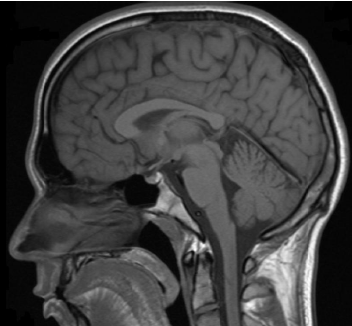

In [7]:
szary

<BarContainer object of 256 artists>

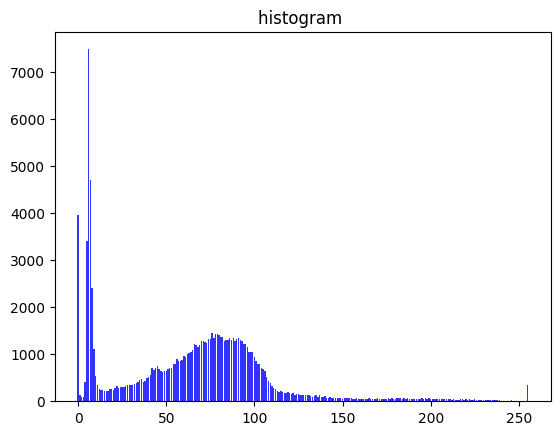

In [8]:
hist = szary.histogram()
plt.title("histogram ")
plt.bar(range(256), hist[:], color='b', alpha=0.8)

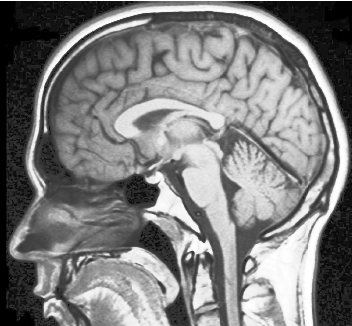

In [9]:
im_equalized1 = ImageOps.equalize(szary, mask = None)
im_equalized1

<BarContainer object of 256 artists>

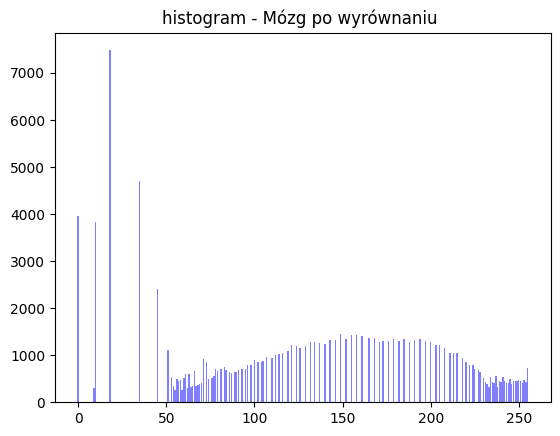

In [10]:
hist = im_equalized1.histogram()
plt.title("histogram - Mózg po wyrównaniu ")
plt.bar(range(256), hist[:], color='b', alpha=0.5)

Wyrównanie z maską

(352, 326) L
(352, 326)


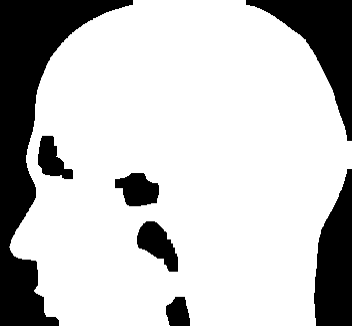

In [11]:
maska = Image.open('maska_brain.png') 
print(maska.size, maska.mode)
print(szary.size)
maska

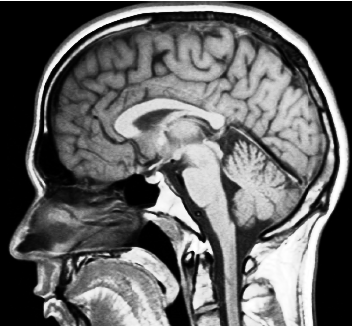

In [12]:

im_equalized2 = ImageOps.equalize(szary, mask = maska)
im_equalized2

<BarContainer object of 256 artists>

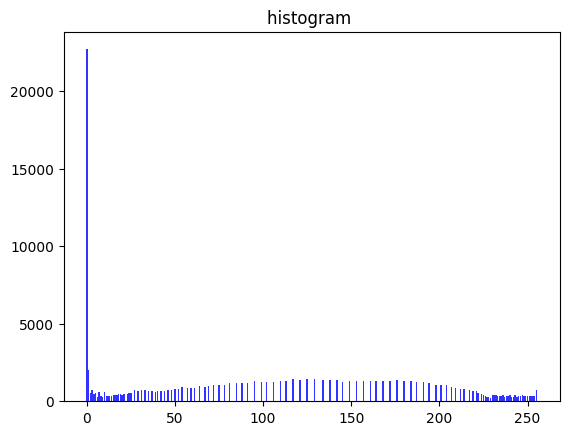

In [13]:
hist = im_equalized2.histogram()
plt.title("histogram ")
plt.bar(range(256), hist[:], color='b', alpha=0.8)

## Wyrównanie obrazów w trybie RGB

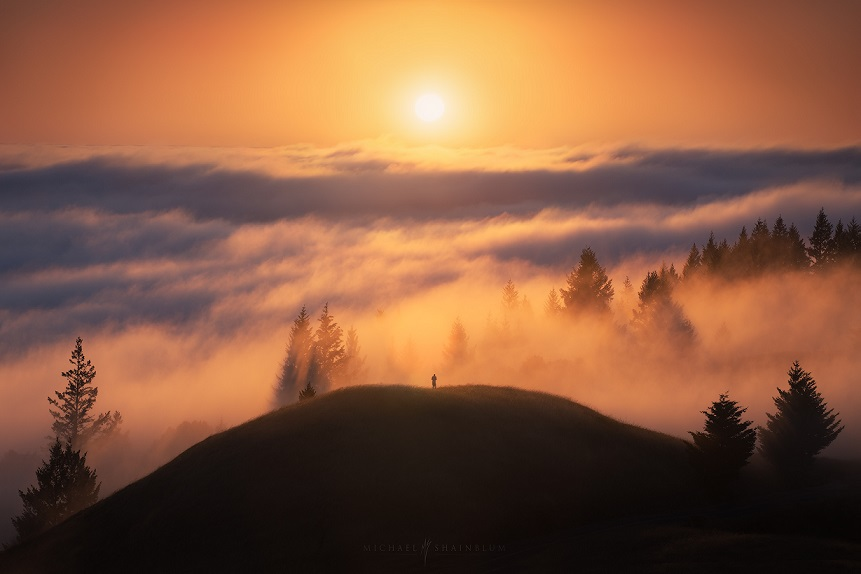

In [14]:
im = Image.open('mgla.jpg') # obraz kolorowy
im


extrema  [(5, 255), (0, 244), (0, 240)]
count  [494214, 494214, 494214]
mean  [136.95908452613645, 90.40623495085126, 63.51917388014099]
median  [149, 91, 73]
stddev  [83.18721585413134, 56.8894532947344, 35.732913863973245]


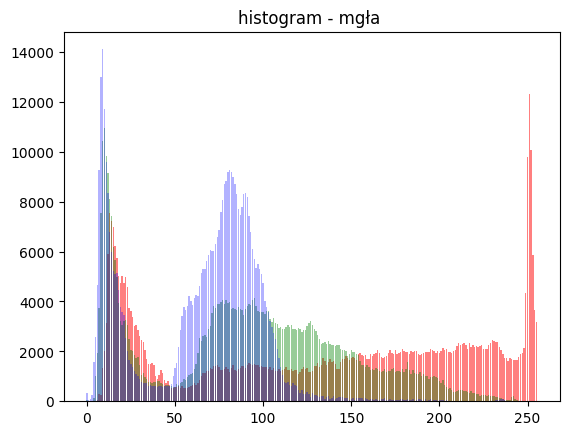

In [15]:
statystyki(im)
hist = im.histogram()
plt.title("histogram - mgła ")
plt.bar(range(256), hist[:256], color='r', alpha=0.5)
plt.bar(range(256), hist[256:2 * 256], color='g', alpha=0.4)
plt.bar(range(256), hist[2 * 256:], color='b', alpha=0.3)
plt.show()

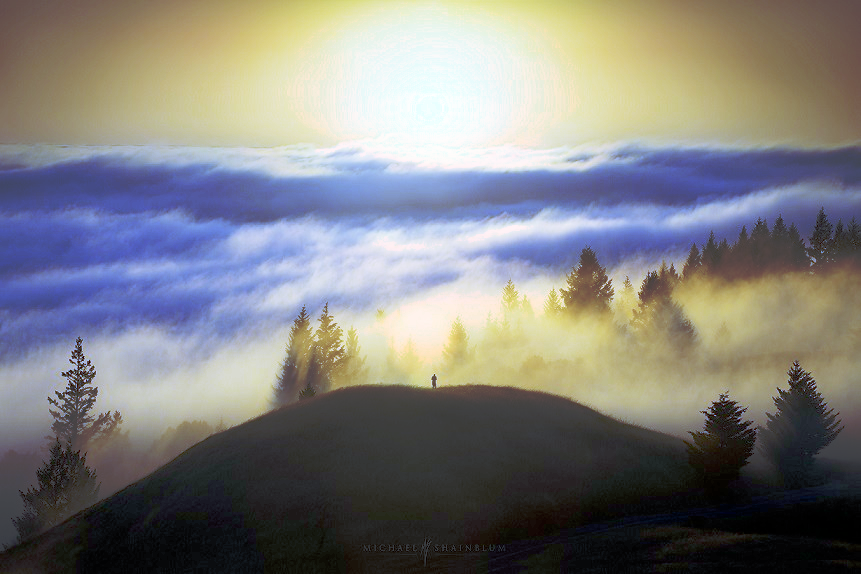

In [16]:
r, g, b = im.split()
# wyrównanie każdego kanału oddzielnie
r_eq = ImageOps.equalize(r)
g_eq = ImageOps.equalize(g)
b_eq = ImageOps.equalize(b)
im1 = Image.merge('RGB', (r_eq, g_eq, b_eq))
im1

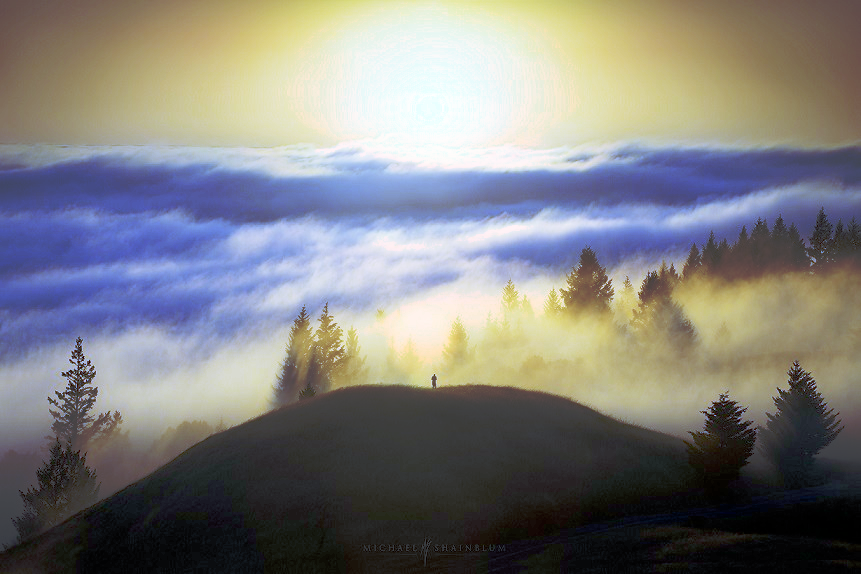

In [17]:
# wyrównaie obrazu RGB
im_equalized1 = ImageOps.equalize(im, mask=None)
im_equalized1

extrema  [(0, 255), (0, 255), (0, 255)]
count  [494214, 494214, 494214]
mean  [127.56359390871161, 126.69678115148498, 125.91618205878426]
median  [128, 126, 125]
stddev  [74.04443163783701, 74.05644815560801, 73.78911379717243]


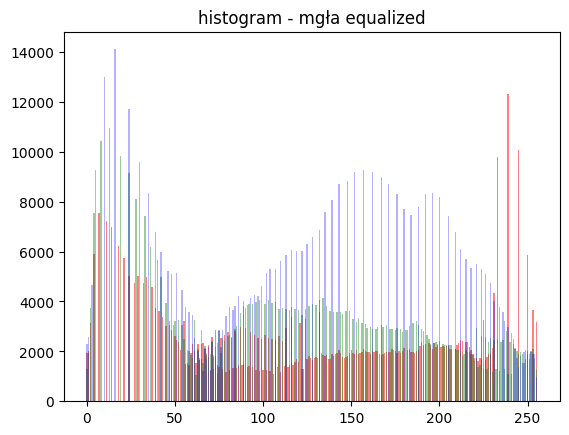

In [18]:
statystyki(im_equalized1)
hist = im_equalized1.histogram()
plt.title("histogram - mgła equalized")
plt.bar(range(256), hist[:256], color='r', alpha=0.5)
plt.bar(range(256), hist[256:2 * 256], color='g', alpha=0.4)
plt.bar(range(256), hist[2 * 256:], color='b', alpha=0.3)
plt.show()

In [19]:
# dowód, że ImageOps.equalize(im) na obrazie RGB działa tak samo jak wyrównanie kazdego kanału oddzielnie i scalenie
diff=ImageChops.difference(im_equalized1, im1)
statystyki(diff)

extrema  [(0, 0), (0, 0), (0, 0)]
count  [494214, 494214, 494214]
mean  [0.0, 0.0, 0.0]
median  [0, 0, 0]
stddev  [0.0, 0.0, 0.0]


# konwersja RGB na L

# L = R * 299/1000 + G * 587/1000 + B * 114/1000

<!-- konwersja RGB na L -->

<!-- L = R * 299/1000 + G * 587/1000 + B * 114/1000 -->

In [20]:
im = Image.open('baby_yoda.jpg') # obraz RGB
r, g, b = im.split()
r_T = np.array(r)
g_T = np.array(g)
b_T = np.array(b)

# konwersja na obraz w odcieniach szarości- nieudane podejscie
# nie stosować tej metody w zadaniu 4 !!!
w1 = 0.299
w2 = 0.587
w3 = 0.114
szary = w1 * r_T + w2 * g_T + w3 * b_T
szary_im = Image.fromarray(szary)
print(szary_im.mode) # tryb 'F'
szary_im.show()
# szary_im.save('szary_yoda.png') # pojawi się błąd OSError: cannot write mode F as PNG


F


# Konwersja na tryb  “1” 

# Stosuje metodę ditheringu Floyda-Steinberga. Ponadto, wartości większe od 127 ustawiane są na 255 (biały), a pozostałe na  0 (czarny). Aby użyć innych wartości niz 127 stosuje się metodę point().
# https://scipython.com/blog/floyd-steinberg-dithering/

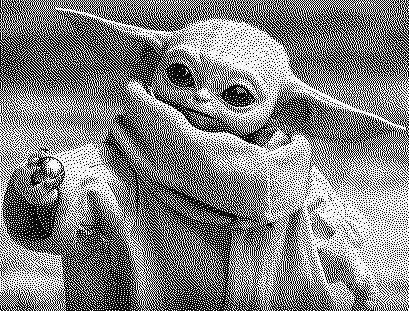

In [21]:
bw1 = im.convert('1', dither=None)
bw1_F = im.convert('1', dither=Image.FLOYDSTEINBERG)
bw1

In [22]:
diff = ImageChops.difference(bw1, bw1_F)
statystyki(diff)


extrema  [(0, 0)]
count  [127199]
mean  [0.0]
median  [0]
stddev  [0.0]


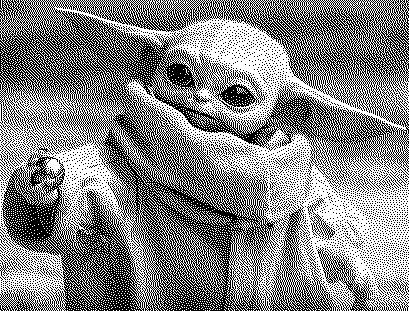

In [23]:
sz1 = im.convert('L')
bw2 = sz1.convert('1')
bw2

extrema  [(0, 255)]
count  [127199]
mean  [101.79230968796925]
median  [0]
stddev  [124.88140237369502]


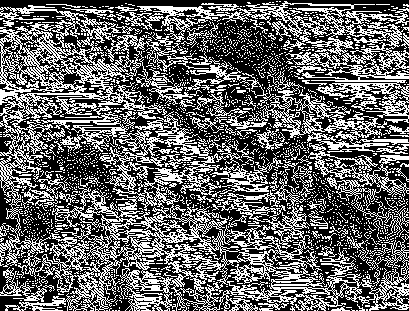

In [24]:
diff = ImageChops.difference(bw1, bw2)
statystyki(diff)
diff

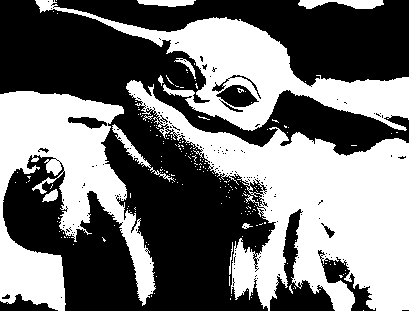

In [25]:
wsp = 127
bw3 = sz1.point(lambda i: i > wsp and 255) # jeżeli nieprawda, że i > wsp wstaw 0 a w przeciwnym przypadku wstaw 255
bw3